<a href="https://colab.research.google.com/github/sujalsin/Market-Prediction-Modeling/blob/main/Market_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yf
from sklearn.model_selection import train_test_split

# Download historical data
df = yf.download('AAPL', start='2015-01-01', end='2023-07-12')

# Select features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Scale the all features data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Separate scaler for close price
scaler_close = MinMaxScaler()
scaler_close.fit(df[['Close']])

# Create function to process the dataset into 60 day look back slices
def processData(data, lb):
    X, Y = [], []
    for i in range(len(data) - lb - 1):
        X.append(data[i: (i + lb), 0])
        Y.append(data[(i + lb), 0])
    return np.array(X), np.array(Y)

look_back = 60  # Days look back
X, y = processData(scaled_data, look_back)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Reshape the feature data to 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), shuffle=True)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predicted data with the 'Close' scaler
train_predict = scaler_close.inverse_transform(train_predict)
Y_train = scaler_close.inverse_transform([y_train])
test_predict = scaler_close.inverse_transform(test_predict)
Y_test = scaler_close.inverse_transform([y_test])

# Create dataframe to compare actual vs predicted prices
comparison_df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': test_predict.flatten()})
print(comparison_df)


[*********************100%***********************]  1 of 1 completed
Epoch 1/50
53/53 [==============================] - 25s 421ms/step - loss: 0.0119 - val_loss: 8.8460e-04
Epoch 2/50
53/53 [==============================] - 19s 363ms/step - loss: 0.0018 - val_loss: 3.3211e-04
Epoch 3/50
53/53 [==============================] - 20s 374ms/step - loss: 0.0016 - val_loss: 4.5884e-04
Epoch 4/50
53/53 [==============================] - 20s 373ms/step - loss: 0.0019 - val_loss: 5.7111e-04
Epoch 5/50
53/53 [==============================] - 19s 364ms/step - loss: 0.0016 - val_loss: 3.1703e-04
Epoch 6/50
53/53 [==============================] - 20s 385ms/step - loss: 0.0017 - val_loss: 3.6918e-04
Epoch 7/50
53/53 [==============================] - 20s 376ms/step - loss: 0.0019 - val_loss: 4.4727e-04
Epoch 8/50
53/53 [==============================] - 19s 363ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/50
53/53 [==============================] - 20s 374ms/step - loss: 0.0018 - val_loss: 4

**Actual vs Predicted Plots**

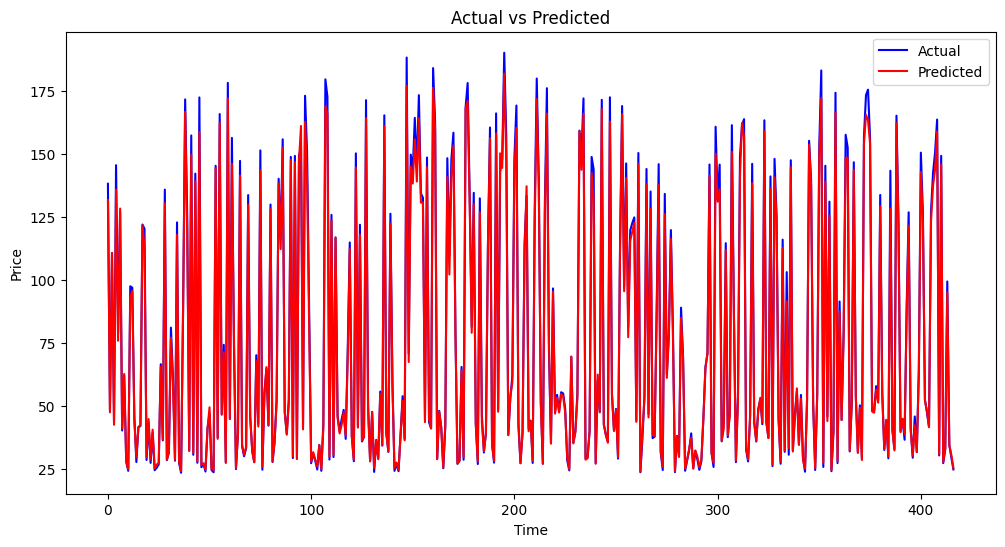

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Y_test.flatten(), color='blue', label='Actual')
plt.plot(test_predict.flatten(), color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


**Residual Plots**

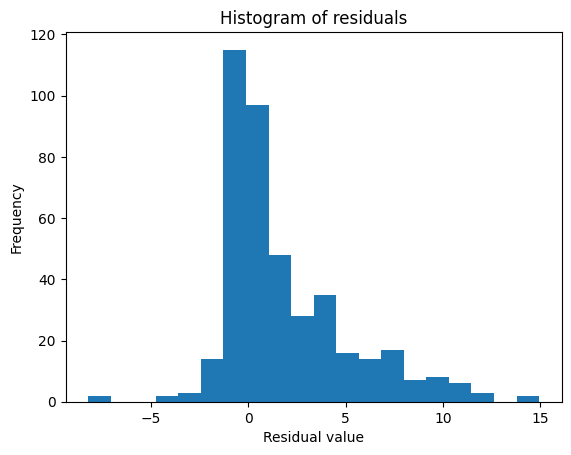

In [12]:
# Calculate residuals
residuals = Y_test.flatten() - test_predict.flatten()

plt.hist(residuals, bins=20)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Frequency')
plt.show()


**Loss Curves**

Epoch 1/10
53/53 [==============================] - 23s 390ms/step - loss: 0.0088 - val_loss: 5.6454e-04
Epoch 2/10
53/53 [==============================] - 21s 398ms/step - loss: 0.0019 - val_loss: 3.2985e-04
Epoch 3/10
53/53 [==============================] - 19s 367ms/step - loss: 0.0016 - val_loss: 5.7119e-04
Epoch 4/10
53/53 [==============================] - 20s 378ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/10
53/53 [==============================] - 20s 377ms/step - loss: 0.0019 - val_loss: 3.2227e-04
Epoch 6/10
53/53 [==============================] - 19s 366ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/10
53/53 [==============================] - 20s 377ms/step - loss: 0.0023 - val_loss: 3.3195e-04
Epoch 8/10
53/53 [==============================] - 20s 376ms/step - loss: 0.0016 - val_loss: 6.5367e-04
Epoch 9/10
53/53 [==============================] - 20s 380ms/step - loss: 0.0015 - val_loss: 5.9674e-04
Epoch 10/10
53/53 [==============================] - 20s 375ms/

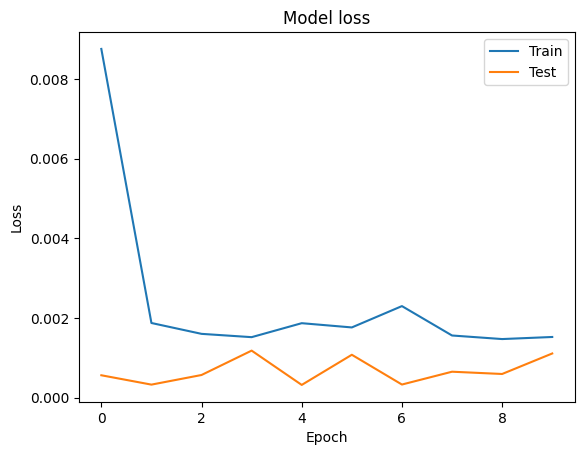

Epoch 1/20
53/53 [==============================] - 23s 378ms/step - loss: 0.0099 - val_loss: 4.8446e-04
Epoch 2/20
53/53 [==============================] - 20s 377ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/20
53/53 [==============================] - 20s 376ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/20
53/53 [==============================] - 19s 366ms/step - loss: 0.0017 - val_loss: 9.8514e-04
Epoch 5/20
53/53 [==============================] - 20s 374ms/step - loss: 0.0020 - val_loss: 5.4490e-04
Epoch 6/20
53/53 [==============================] - 20s 374ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/20
53/53 [==============================] - 19s 364ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/20
53/53 [==============================] - 20s 373ms/step - loss: 0.0016 - val_loss: 3.0529e-04
Epoch 9/20
53/53 [==============================] - 20s 375ms/step - loss: 0.0016 - val_loss: 6.8489e-04
Epoch 10/20
53/53 [==============================] - 20s 370ms/step - l

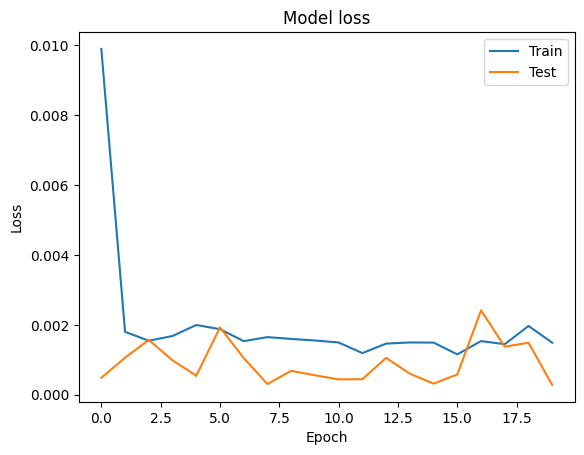

Epoch 1/30
53/53 [==============================] - 22s 369ms/step - loss: 0.0080 - val_loss: 7.0250e-04
Epoch 2/30
53/53 [==============================] - 20s 369ms/step - loss: 0.0022 - val_loss: 8.4855e-04
Epoch 3/30
53/53 [==============================] - 20s 369ms/step - loss: 0.0017 - val_loss: 8.5256e-04
Epoch 4/30
53/53 [==============================] - 19s 358ms/step - loss: 0.0018 - val_loss: 3.7790e-04
Epoch 5/30
53/53 [==============================] - 19s 367ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/30
53/53 [==============================] - 20s 369ms/step - loss: 0.0020 - val_loss: 4.4452e-04
Epoch 7/30
53/53 [==============================] - 19s 358ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/30
53/53 [==============================] - 19s 368ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 9/30
53/53 [==============================] - 20s 370ms/step - loss: 0.0024 - val_loss: 6.7351e-04
Epoch 10/30
53/53 [==============================] - 19s 359ms/step

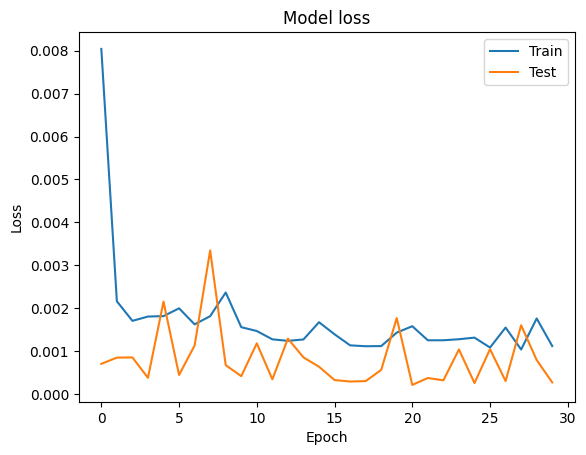

Epoch 1/40
53/53 [==============================] - 23s 381ms/step - loss: 0.0092 - val_loss: 6.1716e-04
Epoch 2/40
53/53 [==============================] - 20s 371ms/step - loss: 0.0019 - val_loss: 8.9339e-04
Epoch 3/40
53/53 [==============================] - 19s 360ms/step - loss: 0.0016 - val_loss: 3.8550e-04
Epoch 4/40
53/53 [==============================] - 20s 370ms/step - loss: 0.0019 - val_loss: 5.3769e-04
Epoch 5/40
53/53 [==============================] - 20s 369ms/step - loss: 0.0017 - val_loss: 6.0857e-04
Epoch 6/40
53/53 [==============================] - 19s 359ms/step - loss: 0.0016 - val_loss: 5.8420e-04
Epoch 7/40
53/53 [==============================] - 20s 370ms/step - loss: 0.0017 - val_loss: 0.0072
Epoch 8/40
53/53 [==============================] - 20s 370ms/step - loss: 0.0045 - val_loss: 7.0076e-04
Epoch 9/40
53/53 [==============================] - 19s 358ms/step - loss: 0.0023 - val_loss: 3.0335e-04
Epoch 10/40
53/53 [==============================] - 20s 37

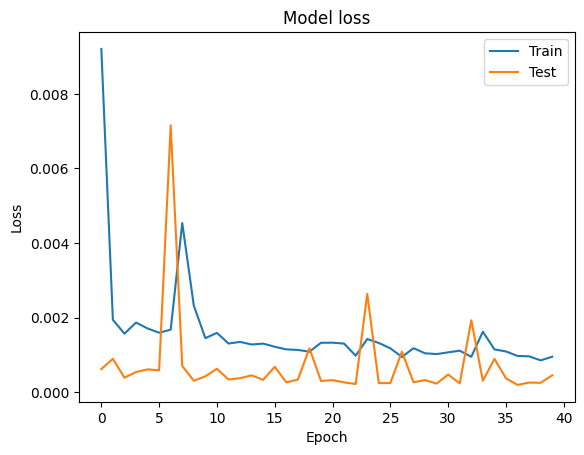

Epoch 1/50
53/53 [==============================] - 24s 381ms/step - loss: 0.0110 - val_loss: 0.0011
Epoch 2/50
53/53 [==============================] - 20s 375ms/step - loss: 0.0017 - val_loss: 4.7024e-04
Epoch 3/50
53/53 [==============================] - 20s 377ms/step - loss: 0.0016 - val_loss: 3.2195e-04
Epoch 4/50
53/53 [==============================] - 19s 365ms/step - loss: 0.0017 - val_loss: 3.1408e-04
Epoch 5/50
53/53 [==============================] - 20s 376ms/step - loss: 0.0015 - val_loss: 3.1790e-04
Epoch 6/50
53/53 [==============================] - 20s 377ms/step - loss: 0.0016 - val_loss: 3.5633e-04
Epoch 7/50
53/53 [==============================] - 20s 374ms/step - loss: 0.0018 - val_loss: 7.5647e-04
Epoch 8/50
53/53 [==============================] - 20s 378ms/step - loss: 0.0015 - val_loss: 7.3186e-04
Epoch 9/50
53/53 [==============================] - 20s 379ms/step - loss: 0.0013 - val_loss: 3.0718e-04
Epoch 10/50
53/53 [==============================] - 20s 37

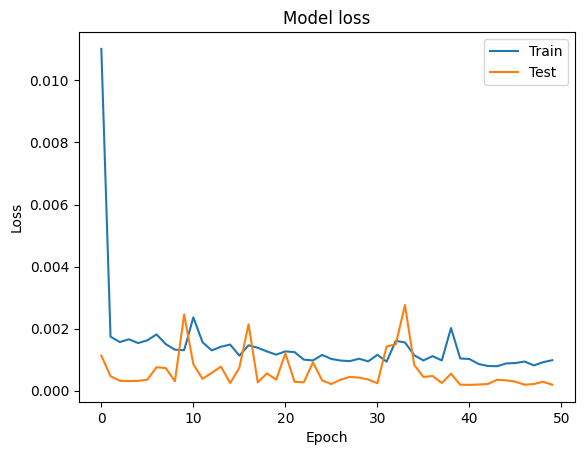

Epoch 1/60
53/53 [==============================] - 23s 388ms/step - loss: 0.0092 - val_loss: 4.4401e-04
Epoch 2/60
53/53 [==============================] - 20s 373ms/step - loss: 0.0019 - val_loss: 5.9214e-04
Epoch 3/60
53/53 [==============================] - 19s 366ms/step - loss: 0.0016 - val_loss: 8.0546e-04
Epoch 4/60
53/53 [==============================] - 20s 373ms/step - loss: 0.0027 - val_loss: 3.4293e-04
Epoch 5/60
53/53 [==============================] - 20s 372ms/step - loss: 0.0016 - val_loss: 3.5639e-04
Epoch 6/60
53/53 [==============================] - 19s 362ms/step - loss: 0.0016 - val_loss: 4.0871e-04
Epoch 7/60
53/53 [==============================] - 20s 374ms/step - loss: 0.0015 - val_loss: 3.4102e-04
Epoch 8/60
53/53 [==============================] - 20s 373ms/step - loss: 0.0013 - val_loss: 2.7594e-04
Epoch 9/60
53/53 [==============================] - 19s 365ms/step - loss: 0.0015 - val_loss: 4.6092e-04
Epoch 10/60
53/53 [==============================] - 20

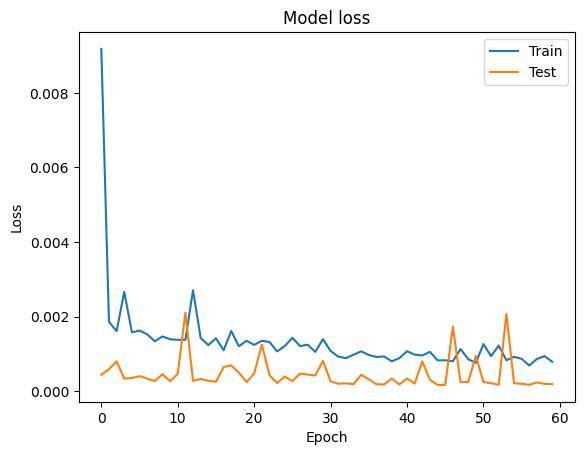

In [13]:
import matplotlib.pyplot as plt

# Define a range of epoch values
epoch_values = [10, 20, 30, 40, 50, 60]

# for i in range(1, 101):
#   epoch_values.append(i)

# Initialize a dictionary to store the validation loss at each epoch
loss_per_epoch = {}

# For each epoch value...
for epochs in epoch_values:

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(256, input_shape=(look_back, 1), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dropout(0.4))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and store the history
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

    # Loss Curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

    # Store the validation loss for this number of epochs
    loss_per_epoch[epochs] = history.history['val_loss']


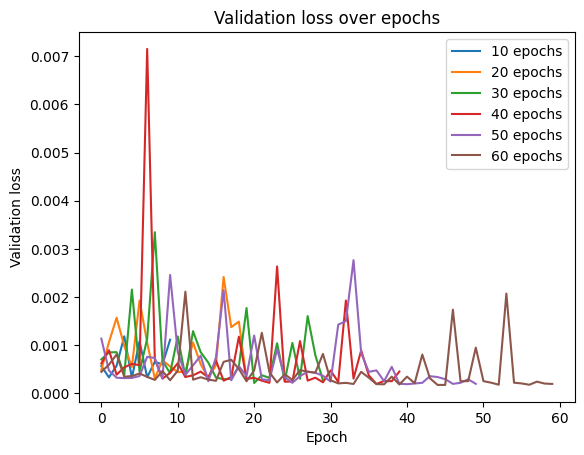

In [14]:
import matplotlib.pyplot as plt

# Plot the validation loss for each epoch value
for epochs, val_loss in loss_per_epoch.items():
    plt.plot(val_loss, label=f'{epochs} epochs')

plt.title('Validation loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()
